In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf
import tensorlayer as tl

In [15]:
def get_gen(input_shape):
    w_init = tf.random_normal_initializer(stddev=0.02)
    g_init = tf.random_normal_initializer(1., 0.02)

    nin = tf.keras.layers.Input(input_shape)
    n = tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', kernel_initializer=w_init,activation='relu')(nin)
    temp=n

    # B residual blocks
    for i in range(16):
        nn = tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', kernel_initializer=w_init)(n)
        nn = tf.keras.layers.BatchNormalization(gamma_initializer=g_init)(nn)
        nn = tf.keras.activations.relu(nn)
        nn = tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', kernel_initializer=w_init)(nn)
        nn = tf.keras.layers.BatchNormalization(gamma_initializer=g_init)(nn)
        nn = tf.keras.layers.Add()([n, nn])
        n=nn

    n = tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', kernel_initializer=w_init,bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=g_init)(n)
    n = tf.keras.layers.Add()([n, temp])

    n = tf.keras.layers.Conv2D(256, (3,3), (1,1), padding='same', kernel_initializer=w_init)(n)
    n = tl.layers.SubpixelConv2d(scale=2, n_out_channel=None)(n)

    n = tf.keras.layers.Conv2D(256, (3,3), (1,1), padding='same', kernel_initializer=w_init)(n)
    n = tl.layers.SubpixelConv2d(scale=2, n_out_channel=None)(n)

    nn = tf.keras.layers.Conv2D(3, (1,1), (1,1), padding='same', kernel_initializer=w_init,activation='tanh')(n)
    generator = tf.keras.models.Model(inputs=nin, outputs=nn, name='generator')
    return generator

In [21]:
def get_Dis(input_shape):
    w_init = tf.random_normal_initializer(stddev=0.02)
    gamma_initializer = tf.random_normal_initializer(1., 0.02)
    df_dim = 64
    
    nin = tf.keras.layers.Input(input_shape)
    n = tf.keras.layers.Conv2D(df_dim, (4,4), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU')(nin)

    n = tf.keras.layers.Conv2D(df_dim, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*2, (4,4), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*2, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*4, (4,4), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*4, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*8, (4,4), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*8, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)

    n = tf.keras.layers.Flatten()(n)
    n = tf.keras.layers.Dense(1024, kernel_initializer=w_init,activation='LeakyReLU')(n)
    n = tf.keras.layers.Dense(1, kernel_initializer=w_init,activation='sigmoid')(n)
    discriminator = tf.keras.models.Model(inputs=nin, outputs=n, name='discriminator')
    return discriminator
    

In [22]:
def get_Dis2(input_shape):
    w_init = tf.random_normal_initializer(stddev=0.02)
    gamma_initializer = tf.random_normal_initializer(1., 0.02)
    df_dim = 64

    nin = tf.keras.layers.Input(input_shape)
    n = tf.keras.layers.Conv2D(df_dim, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU')(nin)

    n = tf.keras.layers.Conv2D(df_dim*2, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*4, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*8, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*16, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df_dim*32, (4,4), (2,2), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df*16, (1,1), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df*8, (1,1), (1,1), padding='same', kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    nn = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)

    n = tf.keras.layers.Conv2D(df*2,(1,1),(1,1),padding='same',kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(nn)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df*2,(3,3),(1,1),padding='same',kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Conv2D(df*8,(3,3),(1,1),padding='same',kernel_initializer=w_init,activation='LeakyReLU',bias_initializer=None)(n)
    n = tf.keras.layers.BatchNormalization(gamma_initializer=gamma_initializer)(n)
    n = tf.keras.layers.Add()([nn,n])

    n = Flatten()(n)
    n = Dense(1,kernel_initializer=w_init,activation='LeakyReLU')(n)
    discriminator = tf.keras.models.Model(inputs=nin, outputs=n, name='discriminator')
    return discriminator

In [126]:
def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image)
    image = tf.cast(image, tf.float32)
    return image

def resize(image,height,width):
    image = tf.image.resize(image,[height,width],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return image

def normalize(image):
    image = (image/127.5)-1
    return image

def random_crop(image):
    image = tf.image.random_crop(image,[384,384,3])
    return image

@tf.function
def random_jitter(image):
    image = resize(image,390,390)
    image = random_crop(image)

    if tf.random.uniform(())>0.5:
        image = tf.image.flip_left_right(image)
    return image

In [127]:
def load_image_train(image_file):
    image = load(image_file)
    image = random_jitter(image)
    image = normalize(image)
    return image

def load_image_test(image_file):
    image = load(image_file)
    image = resize(image,390,390)
    image = normalize(image)
    return image

In [128]:
LR = tf.data.Dataset.list_files(r'C:\Users\kc510\Documents\Projects\Projects_MLOps\Project_SuperResolution\data\train\LR'+'\\*.png',shuffle=False)
LR = LR.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
HR = tf.data.Dataset.list_files(r'C:\Users\kc510\Documents\Projects\Projects_MLOps\Project_SuperResolution\data\train\HR'+'\\*.png',shuffle=False)
HR = HR.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds = tf.data.Dataset.zip((LR,HR))
ds = ds.shuffle(buffer_size=800).batch(4)

In [129]:
for inp,out in ds.take(1):
    print(inp.shape,out.shape)

(4, 384, 384, 3) (4, 384, 384, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


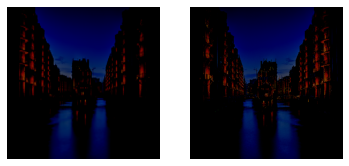

In [130]:
for inp,out in ds.take(1):
    display_list = [inp[0],out[0]]
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(display_list[i]*0.5)
        plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(0, shape=(), dtype=int64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


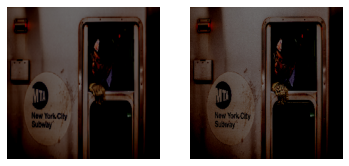

In [116]:
for n, (inp,out) in ds.enumerate():
    display_list = [inp[0],out[0]]
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()
    break